<html>
<body>
<div align="center">
<h3>Prepared by Omar Mahmoud</h3>
    
<h1>Prediction using Supervised Machine Learning</h1>

<h6>Prediction using supervised machine learning involves using a labeled dataset to train a model that can predict the target variable for new data points. The data is preprocessed, split into training and test sets, and a suitable algorithm is chosen. The model is trained on the training set, and its performance is evaluated on the test set. Hyperparameters are tuned to improve performance. Various metrics such as mean squared error, mean absolute error, and R-squared score are used to evaluate the model's performance.</h6>

<h3><a href="https://www.linkedin.com/in/omar-mahmoud-5bb616175/">LinkedIn</a>&nbsp; <a href="https://twitter.com/OmarMah25544092">Twitter</a>&nbsp; <a href="https://www.instagram.com/3amory99/">Instagram</a>&nbsp; <a href="https://www.facebook.com/Mora898/">Facebook</a></h3>
</div>

</div>
</body>
</html>

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering the Data

In [2]:
# Reading data from remote link
df = pd.read_csv('http://bit.ly/w-data')

In [3]:
print('Data imported successfully')
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Identify the data shape

In [5]:
df.shape

(25, 2)

### Dealing with missing values

In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

The data has no missing values

### Duplication in Data 

In [7]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [8]:
df.duplicated().sum()

0

The data has no duplication of data 

In [9]:
df.describe().round()

,Hours,Scores
count,25.0,25.0
mean,5.0,51.0
std,3.0,25.0
min,1.0,17.0
25%,3.0,30.0
50%,5.0,47.0
75%,7.0,75.0
max,9.0,95.0


<function matplotlib.pyplot.show(close=None, block=None)>

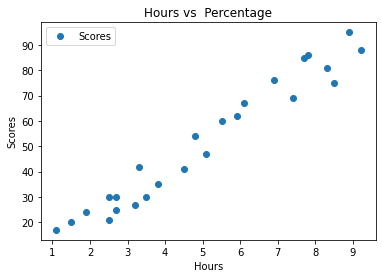

In [10]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores',style = 'o')
plt.title('Hours vs  Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show

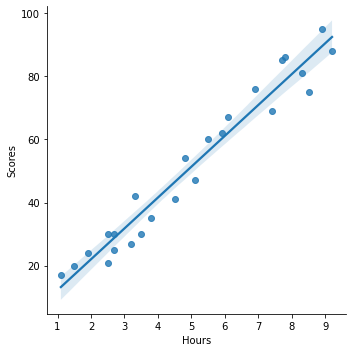

In [11]:
# A fitted line plot distribution using lmplot
sns.lmplot(x='Hours', y='Scores',data = df)

In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The graph depicted above illustrates a direct correlation between the percentage of score achieved and the number of hours studied
- Indicating a **Positive Linear Relationship**

### Preparing the data

The data needs to be segregated into two categories: "attributes" which refer to the inputs, and "labels" which refer to the outputs.

In [13]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [14]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [15]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [16]:
print(X.shape, y.shape)

(25, 1) (25,)


In [17]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [18]:
print(X.shape, y.shape)

(25, 1) (25, 1)


In [19]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [20]:
print(y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Training the Algorithm

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

<img src="linear_reg_formula.png" width=500 height=500 />

In [32]:
intercept = reg.intercept_
coef = reg.coef_
print(r'The intercept of simple linear regression is {}'.format(intercept))
print(r'The coefficient of simple linear regression is {}'.format(coef))

The intercept of simple linear regression is [2.01816004]
The coefficient of simple linear regression is [[9.91065648]]


In [33]:
# Plotting the regression line
line = intercept + coef*X

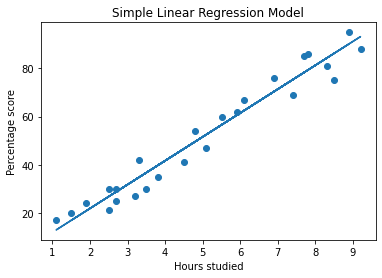

In [34]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Simple Linear Regression Model')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

## Prediction

In [26]:
y_pred = reg.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

## Model Evaluation

Finally, we have to involve assessing the algorithm's performance. This step holds significant importance as it allows for comparison of different algorithms' performance on a given dataset. In this case, we have opted for mean square error as a metric for the sake of simplicity; however, there are numerous other metrics available for this purpose.

In [27]:
from sklearn import metrics
print(r'The mean absolute error is {}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print(r'The mean squared error is {}'.format(metrics.mean_squared_error(y_test,y_pred)))
print(r'Score {}'.format(reg.score(X_test,y_test)))

The mean absolute error is 4.183859899002975
The mean squared error is 21.5987693072174
Score 0.9454906892105356


## Test data

In [28]:
hours = 9.25
hours_reshaped = np.array(hours).reshape(-1,1)
own_pred = reg.predict(hours_reshaped)
print("No of Hours = {}".format(hours_reshaped[0][0]))
print("Predicted Score = {}".format(own_pred[0][0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Model Save

In [29]:
import joblib 
joblib.dump(reg, 'Hours_Score_Model.pk1')

['Hours_Score_Model.pk1']

In [30]:
# Check Hours_Score_Model.pk1
model = joblib.load('Hours_Score_Model.pk1')
test_hour = 6.5
test_hour = X_test
model.predict(test_hour)

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

## That's great! Thanks Sparks Foundation✨